## Product demand prediction using Decision Tree algorithm
### Chaitanya Shinde
### Seat no -37

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Amazon-Products.csv")

In [4]:
# Randomly sample 200000 records
dataset = dataset.sample(n=200000, random_state=42)

In [40]:
dataset.reset_index(drop=True, inplace=True)
dataset['index'] = dataset.index

In [41]:
dataset.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,main_category_encoded,sub_category_encoded,discount_percent,index
0,MyBlush Women Top,women's clothing,Western Wear,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/MyBlush-Womens-Solid-Cla...,3.5,9,699.0,2299.0,18,109,69.595476,0
1,Ridhi Home & Decor Brass Decorative Weighing S...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Brass-Decorative-Weighin...,3.7,64,380.0,500.0,1,1,24.000000,1
2,Adidas Men's Ellipto Run M Leather Shoe,men's shoes,Sports Shoes,https://m.media-amazon.com/images/I/71RsZ19e-w...,https://www.amazon.in/Adidas-Ellipto-Running-D...,3.6,23,1274.0,2499.0,11,91,49.019608,2
3,JJ TEES Polyester Half Sleeve Jersey with Roun...,men's clothing,T-shirts & Polos,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/JJ-TEES-Polyester-Sleeve...,3.5,10,345.0,999.0,10,97,65.465465,3
4,NILUS Cute and Shiny Stone Chain Bracelet for ...,accessories,Fashion & Silver Jewellery,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/NILUS-Fashion-Jewelry-Si...,4.5,9,359.0,1250.0,0,36,71.280000,4


In [42]:
dataset.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price',
       'main_category_encoded', 'sub_category_encoded', 'discount_percent',
       'index'],
      dtype='object')

In [43]:
dataset.tail()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,main_category_encoded,sub_category_encoded,discount_percent,index
121105,Arrow Men Pink Manhattan Slim Fit Floral Print...,men's clothing,Shirts,https://m.media-amazon.com/images/I/810K7mK6u7...,https://www.amazon.in/Arrow-Sports-Casual-Shir...,4.1,12,1429.0,2199.0,10,87,35.015916,121105
121106,Baggit Women's Satchel Handbag,accessories,Handbags & Clutches,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Baggit-Spring-Summer-Lea...,4.0,24,1156.0,2890.0,0,45,60.000000,121106
121107,XYXX Men's Ace Premium Cotton Modal Round Neck...,men's clothing,Innerwear,https://m.media-amazon.com/images/I/71cOKo9awp...,https://www.amazon.in/XYXX-Premium-Cotton-Moda...,3.5,90,699.0,897.0,10,58,22.073579,121107
121108,Shomex 8 X 10.5 FT Black Backdrop Background R...,"tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/SHOMEX-Black-Background-...,3.5,17,379.0,899.0,17,19,57.842047,121108
121109,Prolific Men's Casual Sneakers,men's shoes,Casual Shoes,https://m.media-amazon.com/images/I/51+UWM48D5...,https://www.amazon.in/Prolific-Mens-Casual-Sne...,2.7,32,748.0,2099.0,11,27,64.363983,121109


In [44]:
dataset.shape

(121110, 13)

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121110 entries, 0 to 121109
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   name                   121110 non-null  object 
 1   main_category          121110 non-null  object 
 2   sub_category           121110 non-null  object 
 3   image                  121110 non-null  object 
 4   link                   121110 non-null  object 
 5   ratings                121110 non-null  float64
 6   no_of_ratings          121110 non-null  int64  
 7   discount_price         121110 non-null  float64
 8   actual_price           121110 non-null  float64
 9   main_category_encoded  121110 non-null  int64  
 10  sub_category_encoded   121110 non-null  int64  
 11  discount_percent       121110 non-null  float64
 12  index                  121110 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 12.0+ MB


In [46]:
dataset['name'].unique()

array(['MyBlush Women Top',
       'Ridhi Home & Decor Brass Decorative Weighing Scale Set, 10 g (Golden and Brown)',
       "Adidas Men's Ellipto Run M Leather Shoe", ...,
       "XYXX Men's Ace Premium Cotton Modal Round Neck Vest",
       'Shomex 8 X 10.5 FT Black Backdrop Background Rod Pocket for Photography Backdrop, Photoshoot Background,Video production, ...',
       "Prolific Men's Casual Sneakers"], dtype=object)

In [48]:
dataset.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price',
       'main_category_encoded', 'sub_category_encoded', 'discount_percent',
       'index'],
      dtype='object')

In [49]:
dataset.dropna(inplace=True)


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121110 entries, 0 to 121109
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   name                   121110 non-null  object 
 1   main_category          121110 non-null  object 
 2   sub_category           121110 non-null  object 
 3   image                  121110 non-null  object 
 4   link                   121110 non-null  object 
 5   ratings                121110 non-null  float64
 6   no_of_ratings          121110 non-null  int64  
 7   discount_price         121110 non-null  float64
 8   actual_price           121110 non-null  float64
 9   main_category_encoded  121110 non-null  int64  
 10  sub_category_encoded   121110 non-null  int64  
 11  discount_percent       121110 non-null  float64
 12  index                  121110 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 12.0+ MB


In [51]:
dataset.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price',
       'main_category_encoded', 'sub_category_encoded', 'discount_percent',
       'index'],
      dtype='object')

In [52]:
# Replace non-numeric values in 'ratings' with NaN, then convert to float
dataset['ratings'] = pd.to_numeric(dataset['ratings'], errors='coerce').astype(float)

In [53]:
dataset['discount_price'] = dataset['discount_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
dataset['actual_price'] = dataset['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

In [56]:
dataset['no_of_ratings'] = dataset['no_of_ratings'].replace('.','').astype(int)

In [58]:
# Encode categorical variables
label_encoder = LabelEncoder()
dataset['main_category_encoded'] = label_encoder.fit_transform(dataset['main_category'])
dataset['sub_category_encoded'] = label_encoder.fit_transform(dataset['sub_category'])

In [59]:
dataset.dropna(inplace=True)

In [60]:
dataset.shape

(121110, 13)

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121110 entries, 0 to 121109
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   name                   121110 non-null  object 
 1   main_category          121110 non-null  object 
 2   sub_category           121110 non-null  object 
 3   image                  121110 non-null  object 
 4   link                   121110 non-null  object 
 5   ratings                121110 non-null  float64
 6   no_of_ratings          121110 non-null  int64  
 7   discount_price         121110 non-null  float64
 8   actual_price           121110 non-null  float64
 9   main_category_encoded  121110 non-null  int64  
 10  sub_category_encoded   121110 non-null  int64  
 11  discount_percent       121110 non-null  float64
 12  index                  121110 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 12.0+ MB


In [62]:

# Feature Engineering
dataset['discount_percent'] = (dataset['actual_price'] - dataset['discount_price']) * 100 / dataset['actual_price']

# Feature and Target Selection
categorical_features = ['main_category_encoded', 'sub_category_encoded']
numerical_features = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'discount_percent']

In [63]:
# Standardize Numerical Data
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(dataset[numerical_features])
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_features)


In [64]:
# Combine Features
X = pd.concat([numerical_df, dataset[categorical_features].reset_index(drop=True)], axis=1)
y = dataset['no_of_ratings']

In [65]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
X_train

,ratings,no_of_ratings,discount_price,actual_price,discount_percent,main_category_encoded,sub_category_encoded
7200,0.908595,-0.481715,-0.172014,-0.004444,1.167750,0,15
94257,0.511252,-0.475677,0.838377,0.040485,-0.667375,1,1
114251,-0.150987,-0.113387,-0.245718,-0.014470,1.272917,18,28
46919,-0.018539,4.638647,-0.196664,-0.010703,0.889447,10,87
4168,0.113909,-0.385104,-0.257164,-0.018669,0.426658,17,20
...,...,...,...,...,...,...,...
110268,-0.283434,-0.469638,0.069863,0.004080,0.005735,10,61
119879,-1.078121,-0.185845,-0.232637,-0.014117,1.033946,11,91
103694,-0.283434,-0.059043,-0.217920,-0.014117,0.710611,17,19
860,0.643700,0.816490,1.672297,0.149190,0.421140,14,26


In [67]:
X_test

,ratings,no_of_ratings,discount_price,actual_price,discount_percent,main_category_encoded,sub_category_encoded
9286,-1.607911,-0.475677,-0.242611,-0.012410,1.447218,0,108
68282,-1.078121,-0.373028,-0.232637,-0.015824,0.657423,4,24
61647,-0.018539,-0.469638,-0.219392,-0.016962,-0.223779,6,54
55481,-1.078121,-0.481715,-0.265339,-0.019523,0.295350,10,97
35831,-0.283434,-0.209997,-0.257818,-0.015824,1.376830,18,28
...,...,...,...,...,...,...,...
67073,1.570833,-0.481715,-0.159383,-0.010157,0.423385,14,93
112383,0.246356,-0.439448,-0.231002,-0.015824,0.610708,18,28
111760,-0.150987,-0.457562,-0.224461,-0.015824,0.423849,0,108
4243,1.570833,-0.487753,1.955012,0.071024,-1.651839,0,44


In [68]:
# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


In [69]:
# Evaluation
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
dt_r2 = r2_score(y_test, y_pred_dt)


In [70]:

print(f"Decision Tree - MAE: {dt_mae}, RMSE: {dt_rmse}, R²: {dt_r2}")

Decision Tree - MAE: 0.00024770869457517957, RMSE: 0.015738764073941116, R²: 0.9999999912400551


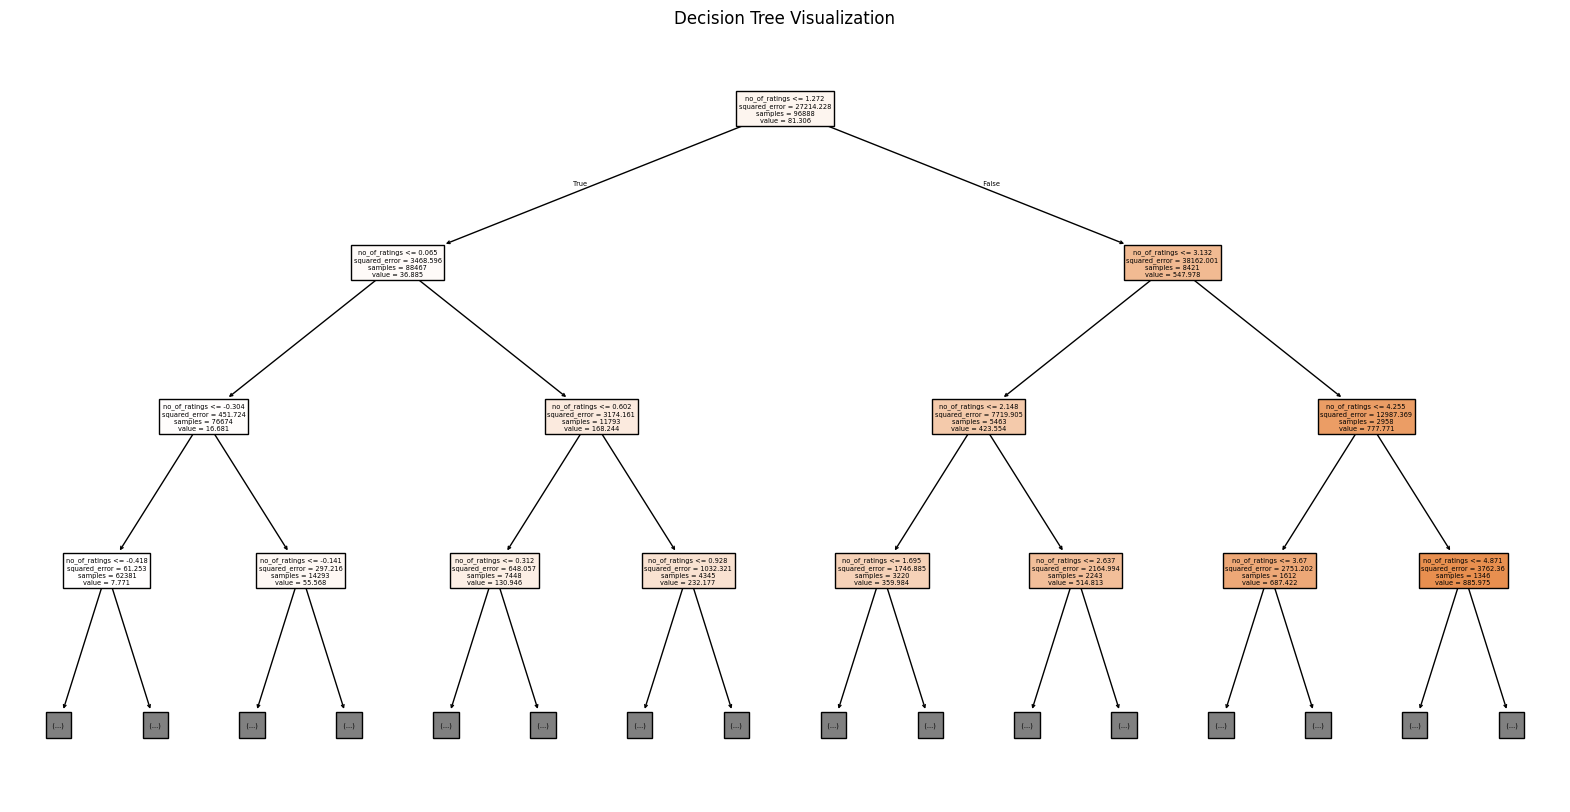

In [80]:
# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

In [87]:
# Predict Demand for a Specific Product
sample_index = X_test.index[1806]
sample_input = X_test.loc[[sample_index]]
predicted_demand_dt = dt_model.predict(sample_input)

predicted_product = dataset.loc[sample_index, 'name']
print(f"Decision Tree - Predicted Demand for {predicted_product}: {predicted_demand_dt[0]:.2f}")

Decision Tree - Predicted Demand for (Renewed) Skullcandy Hesh 2 Bluetooth Wireless Over-Ear Headphones - Black, S6HBGY-374: 43.00


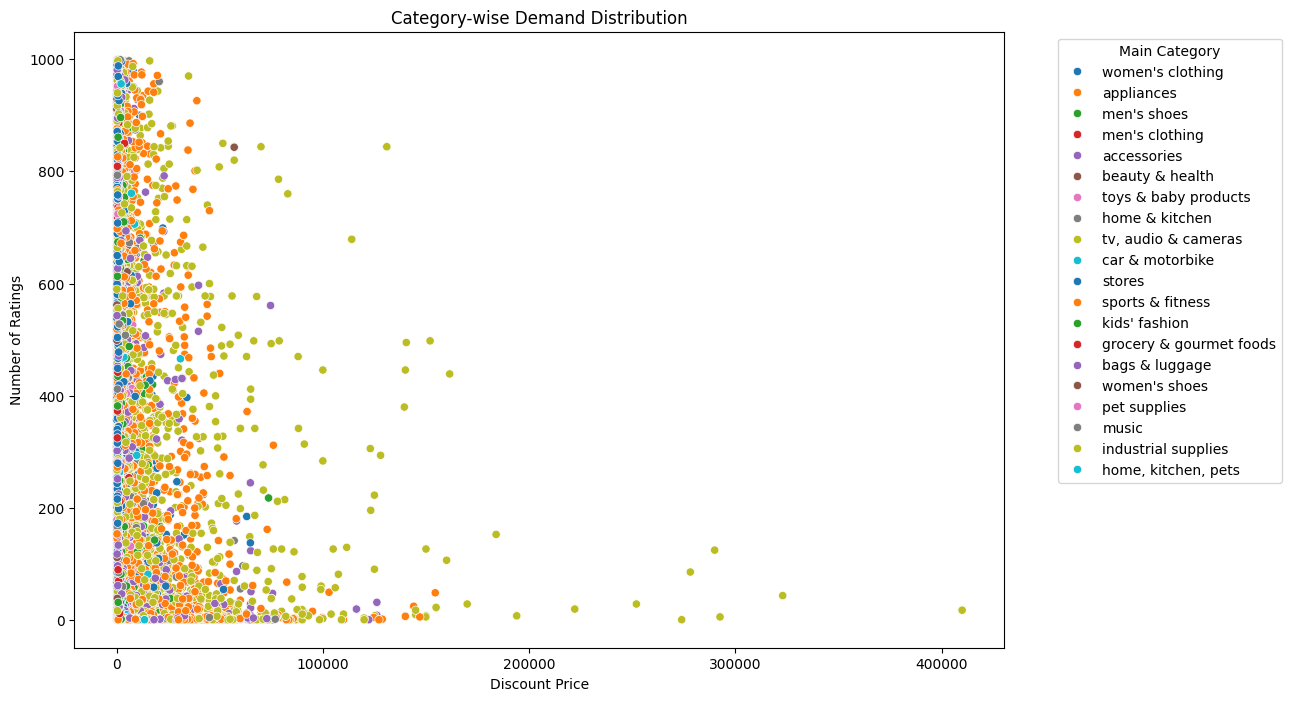

Most In-Demand Category: women's clothing
Most In-Demand Subcategory in women's clothing: Clothing


In [84]:
# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
dataset['cluster'] = kmeans.fit_predict(X)

# Identify Cluster with Highest Demand
cluster_demand = dataset.groupby('cluster')['no_of_ratings'].mean().idxmax()
most_demand_cluster = dataset[dataset['cluster'] == cluster_demand]

# Visualize Categories in Scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=dataset['discount_price'], y=dataset['no_of_ratings'], hue=dataset['main_category'], palette='tab10')
plt.title("Category-wise Demand Distribution")
plt.xlabel("Discount Price")
plt.ylabel("Number of Ratings")
plt.legend(title="Main Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Function to Predict Most In-Demand Category and Subcategory
def predict_most_in_demand_category():
    category_demand = dataset.groupby('main_category')['no_of_ratings'].sum().idxmax()
    most_demand_category = dataset[dataset['main_category'] == category_demand]

    subcategory_demand = most_demand_category.groupby('sub_category')['no_of_ratings'].sum().idxmax()

    print(f"Most In-Demand Category: {category_demand}")
    print(f"Most In-Demand Subcategory in {category_demand}: {subcategory_demand}")

predict_most_in_demand_category()